This notebook is to analyze the MSE of the training data vs predictions for the custom loss model to test the cosine similarity cluster hypothesis

/Users/kalliehuynh/miniforge3/envs/stenv/lib/python3.8/site-packages/jax/_src/lib/__init__.py:34: UserWarning: JAX on Mac ARM machines is experimental and minimally tested. Please see https://github.com/google/jax/issues/5501 in the event of problems.
  warnings.warn("JAX on Mac ARM machines is experimental and minimally tested. "


Instructions for updating:
non-resource variables are not supported in the long term
loading data...
creating embeddings dictionary...
testX shape: (449, 1536)
testY shape: (449, 768)
loading data complete!
data reshaping...
data reshaping complete!
network building...
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
training...
INFO:tensorflow:Restoring parameters from /Users/kalliehuynh/compound-word-embeddings/BERT_models/BERT_model2_08.tfl


2022-06-25 21:55:15.865439: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


test acc: [-3.533343348046454]
Generate predictions for  3  samples
predictions shape: (3, 768)


PREDICTED EMBEDDING
c1          air
c2        lines
cmp    airlines
Name: 1046, dtype: object ['taxi-ways', 'viareggio', 'toughs', 'sewers', 'graybeards']
closest cosine distance to the prediction: 0.15989959239959717, 0.15140140056610107
c1        frontiers
c2              men
cmp    frontiersmen
Name: 1047, dtype: object ['appraisers', 'self-mastery', 'galahad', 'miantonomi', 'contusions']
closest cosine distance to the prediction: 0.19457006454467773, 0.13691145181655884
c1          mantle
c2           piece
cmp    mantlepiece
Name: 1048, dtype: object ['eclat', 'feversham', 'morose', 'bernini', 'butane']
closest cosine distance to the prediction: 0.15173417329788208, 0.15296363830566406



/Users/kalliehuynh/miniforge3/envs/stenv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kalliehuynh/miniforge3/envs/stenv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/kalliehuynh/miniforge3/envs/stenv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kalliehuynh/miniforge3/envs/stenv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


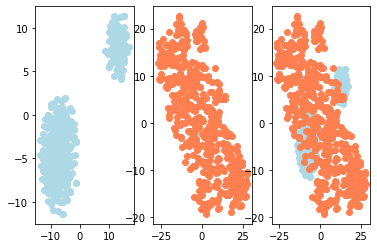

BATCH SIZE: 1
LEARNING_RATE: 1e-07


In [1]:
from lstm import *

In [3]:
# find closest embeddings

def find_closest_embeddings(embedding):
    distances = []
    words = list(embeddings_dict.keys())
    for word in words:
        distances.append(spatial.distance.euclidean(embeddings_dict[word], embedding)) 

    pairs = zip(words, distances)
    sorted_pairs = sorted(pairs, key=lambda x: x[1])
    words, distances = zip(*sorted_pairs)
    return words

find_closest_embeddings(embeddings_dict['runabout'])

('runabout',
 'fuzz',
 'would-be',
 'conditioner',
 "peter's",
 'formulations',
 'capes',
 'vs.',
 'newspaperman',
 "year's",
 'nostalgic',
 'in-group',
 'so-called',
 'detergent',
 'downright',
 'tappets',
 'landscaped',
 'modifier',
 "r's",
 'spree',
 '--',
 'rebuff',
 'twister',
 'antiseptic',
 'gratt',
 'esprit',
 'lousy',
 'eromonga',
 'sonofabitch',
 'whirling',
 'speck',
 'youngster',
 'misplaced',
 'pineapple',
 'bunks',
 'dismal',
 'chic',
 'u.',
 'salesmen',
 'd.',
 "woman's",
 'gait',
 'virtuous',
 'wasteful',
 'braces',
 'distressing',
 'mileage',
 'slicker',
 'vitality',
 'chore',
 'plywood',
 'frightful',
 'courtier',
 'porous',
 's.',
 "night's",
 'hustler',
 'outrigger',
 'interlobular',
 'towne',
 'pansies',
 'wonderfully',
 'purified',
 'piping',
 "'em",
 'tiers',
 'ducts',
 'impersonal',
 "1/2''",
 'rousing',
 'momentous',
 'cleaners',
 'workbench',
 'watercolor',
 'st.',
 'bathtub',
 'zing',
 "car's",
 'slum',
 'lauro',
 'skinless',
 'nondescript',
 'm.',
 'chisel',

In [14]:
print(spatial.distance.euclidean(embeddings_dict['runner'], embeddings_dict['track']))
print(spatial.distance.euclidean(embeddings_dict['runner'], embeddings_dict['sleep']))

11.454912185668945
13.021169662475586


In [32]:
data

,Unnamed: 0,cmp,c1,c2,c1_000,c1_001,c1_002,c1_003,c1_004,c1_005,...,cmp_758,cmp_759,cmp_760,cmp_761,cmp_762,cmp_763,cmp_764,cmp_765,cmp_766,cmp_767
0,0,runabout,run,about,0.414576,-0.210916,-0.028160,-0.200306,-0.033100,0.523064,...,0.066236,-0.056037,0.575261,0.573714,-0.098946,0.021482,-0.205518,-0.554329,0.100084,-0.304837
1,1,roundabout,round,about,0.156571,0.390919,0.608756,-0.122569,-0.513023,0.212003,...,0.019120,0.184338,-0.085161,-0.252538,0.388273,-0.655197,-0.530015,-0.248255,0.011908,0.168893
2,2,headache,head,ache,0.621667,0.574008,0.552805,-0.492589,0.257478,-0.169695,...,0.080978,-0.279476,-0.143285,-0.369631,0.163176,-0.079538,-0.759058,-0.295339,0.139259,-0.151527
3,3,headaches,head,aches,0.583519,0.258965,-0.191624,-0.049424,0.075170,-0.388351,...,-0.025809,-0.301867,0.084577,-0.104307,-0.073456,0.097325,-0.247239,-0.255747,0.257444,-0.078226
4,4,hereafter,here,after,0.396984,0.519315,0.330839,-0.031541,0.311588,-0.172309,...,-0.119436,-0.080804,0.431402,-0.092761,0.428848,-0.065232,-0.122348,-0.317592,0.377940,-0.158158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,1490,vineyards,vine,yards,0.364265,-0.048252,0.228373,0.228604,-0.021495,-0.072723,...,-0.138282,-0.102575,-0.105579,-0.313952,0.058906,-0.269895,-0.137502,-0.232256,0.296524,0.081914
1491,1491,graveyards,grave,yards,0.424670,0.347542,-0.033766,-0.263636,-0.012448,0.065504,...,-0.118777,-0.014629,0.002452,-0.378843,-0.136526,0.408200,-0.242030,-0.173700,0.261287,-0.198432
1492,1492,backyards,back,yards,0.432405,-0.382446,0.271260,0.356241,-0.007071,-0.218560,...,-0.354548,0.123533,-0.166038,-0.154431,0.398102,-0.311313,-0.195113,-0.294068,0.449856,-0.318793
1493,1493,courtyards,court,yards,-0.049463,0.520676,-0.094763,-0.084370,-0.511730,-0.101410,...,-0.090770,-0.102345,-0.373681,0.073067,-0.294890,-0.102587,0.047436,-0.304524,0.230720,0.145850


In [42]:
data = data.sample(frac=1)


In [49]:
# Generate some predictions to analyze MSE
samples = 30

true_words = data.iloc[train_rows:, 1]
true_embeddings = np.array(data.iloc[train_rows:, 1540:], dtype='float32')
zipped_embeddings = list(zip(true_words, testX, true_embeddings))
zipped_embeddings = random.sample(zipped_embeddings, samples)
true_words, testX, true_embeddings = zip(*zipped_embeddings)
predictions = model.predict(testX)
# find_closest_embeddings(predictions[9])

0.26779732

In [27]:
def mse(vec1, vec2):
    # This function returns the MSE of two vectors.
    difference = np.subtract(vec1, vec2)
    squared = np.square(difference)
    return squared.mean()


In [28]:
mse_list = []
for i in range(samples):
    true = true_embeddings[i]
    predicted = predictions[i]
    mse_list.append(mse(true, predicted))
print(mse_list)

[1.1119814, 0.5316268, 0.84172565, 0.9729654, 1.0419451, 0.8255002, 1.0958315, 0.68771267, 1.154625, 1.1452233, 0.95937985, 1.0240351, 0.7842565, 1.1436298, 0.7935856, 1.1469226, 0.79596996, 0.8038232, 0.6896386, 0.6548052, 1.1010928, 1.0970889, 0.77439946, 0.7902538, 0.7686935, 0.55808824, 0.7559316, 0.6597267, 0.5594906, 1.0672537]


In [70]:
#all_embeddings = pd.DataFrame(columns=['cmp', 'c1', 'c2', *c1_labels, *c2_labels, *cmp_labels])
#all_embeddings[['cmp', 'c1', 'c2']] = embedded_ladec[['stim', 'c1', 'c2']]
#testY = np.array(data.iloc[train_rows:, 104:], dtype="float32")
true_labels = ['true_%02d' % x for x in range(768)]
predicted_labels = ['predicted_%02d' % x for x in range(768)]

# print(predicted_words)
summary = pd.DataFrame(columns=['true_word', 'closest_word', 'mse', *true_labels, *predicted_labels])
summary['true_word'] = true_words
# summary.set_index('true_word', inplace=True)

# summary['predicted_word'] = predicted_words

summary['mse'] = mse_list
for i in summary.index:
    summary.loc[i, predicted_labels] = predictions[i]
    summary.loc[i, 'closest_word'] = find_closest_embeddings(predictions[i])[0]
    summary.loc[i, true_labels] = embeddings_dict[summary.loc[i, 'true_word']]
summary


,true_word,closest_word,mse,true_00,true_01,true_02,true_03,true_04,true_05,true_06,...,predicted_758,predicted_759,predicted_760,predicted_761,predicted_762,predicted_763,predicted_764,predicted_765,predicted_766,predicted_767
0,shirtsleeve,butane,1.111981,0.364148,0.3915,0.1443,-0.237722,-0.024611,-0.170209,0.250984,...,0.159787,-0.025242,0.49838,0.187377,0.641917,-0.045131,-0.705057,-0.216467,1.534534,-0.508893
1,boxcars,bernini,0.531627,-0.018446,0.48593,0.088264,-0.226754,-0.000547,-0.186492,0.436184,...,-0.107399,-0.236533,0.257965,-0.562054,0.502319,-0.285172,-1.070011,-0.542149,1.307786,-0.240325
2,bowstring,skillet,0.841726,0.031652,0.502002,0.035274,-0.105409,-0.148418,-0.051374,0.183397,...,0.049032,-0.216581,0.665933,-0.210248,0.306596,-0.538133,-0.977885,-0.690978,1.141226,-0.040827
3,flagpoles,bumblebees,0.972965,-0.636052,0.021186,0.089298,-0.111055,0.187731,0.128351,0.44951,...,-0.124134,0.066163,0.493502,-0.467716,0.214198,-0.541293,-0.530456,-0.367103,0.986311,0.047379
4,nosebleed,sobriquet,1.041945,0.357873,-0.244839,0.265241,0.234859,0.241795,-0.046938,-0.174508,...,-0.36326,-0.043068,0.480982,-0.403116,0.502137,-0.530305,-1.484193,-0.495646,1.094449,-0.457741
5,freeholders,heinkel,0.825500,0.178817,0.595218,0.169965,-0.204836,0.024188,-0.538827,0.083869,...,-0.112574,0.012318,0.42349,-0.337949,0.400254,-1.096043,-0.884831,-0.52939,1.088053,-0.090509
6,seaweed,hoodlum,1.095832,0.239908,0.450799,-0.109701,-0.1235,-0.278474,-0.055657,0.239502,...,-0.441551,-0.235153,-0.002713,-0.582421,0.63746,-0.35602,-1.308649,-0.684314,0.901402,-0.439657
7,snapshots,tintoretto,0.687713,0.417208,0.297186,0.178499,-0.235778,0.050883,-0.178731,0.047902,...,0.50328,-0.114813,0.588693,-1.028264,0.032722,-0.607561,-0.538329,-0.262194,1.542373,-0.025988
8,churchyard,tintoretto,1.154625,0.487005,0.093107,-0.025493,-0.555982,0.354619,0.265553,0.032269,...,-0.04885,-0.041725,0.340985,-0.800362,0.361294,-0.906704,-0.709288,-0.40437,1.234655,0.076933
9,gaslights,prudence,1.145223,-0.054383,0.633215,-0.472038,-0.440746,-0.073124,0.345527,0.487746,...,-0.030643,0.208666,0.296308,-0.124101,0.198919,-0.705274,-0.280957,0.183864,1.371763,-0.381288


In [52]:
# Calculate the standard deviation of the MSEs
std_dev = np.std(mse_list)
std_dev

0.19671053

In [53]:
# Sort the rows by MSE
summary = summary.sort_values("mse")
summary

,true_word,closest_word,mse,true_00,true_01,true_02,true_03,true_04,true_05,true_06,...,predicted_758,predicted_759,predicted_760,predicted_761,predicted_762,predicted_763,predicted_764,predicted_765,predicted_766,predicted_767
1,boxcars,bernini,0.531627,-0.018446,0.48593,0.088264,-0.226754,-0.000547,-0.186492,0.436184,...,-0.107399,-0.236533,0.257965,-0.562054,0.502319,-0.285172,-1.070011,-0.542149,1.307786,-0.240325
25,wellbeing,morose,0.558088,0.624331,0.550828,0.219542,-0.381654,-0.840544,-0.109962,0.756758,...,0.064346,-0.29463,0.49908,0.3803,0.609597,-0.07081,-1.005721,-0.661686,1.249671,-0.404272
28,postmen,morose,0.559491,0.527193,0.218414,0.376354,0.017862,0.01019,-0.000453,-0.12131,...,-0.005002,-0.137906,0.230236,-0.182958,0.687207,-0.300478,-0.881788,-0.49785,1.125813,-0.295694
19,courthouse,newsboy,0.654805,0.532611,0.328263,-0.06207,0.146633,-0.134167,-0.409956,-0.371037,...,-0.108468,-0.183667,0.683607,-0.102427,0.561804,-1.206311,-1.317382,-0.702433,1.062834,0.242912
27,sightseeing,threshhold,0.659727,0.912359,0.162458,0.245707,-0.172131,-0.60167,-0.236407,0.291425,...,-0.00653,0.062581,0.678488,-0.245415,0.212227,-0.508817,-0.862341,-0.290426,1.529574,-0.470454
7,snapshots,tintoretto,0.687713,0.417208,0.297186,0.178499,-0.235778,0.050883,-0.178731,0.047902,...,0.50328,-0.114813,0.588693,-1.028264,0.032722,-0.607561,-0.538329,-0.262194,1.542373,-0.025988
18,bloodshed,tintoretto,0.689639,-0.132963,0.092351,0.36988,-0.167792,-0.149637,-0.292876,0.403412,...,0.083369,-0.364631,0.232614,-0.802168,0.174769,-0.319575,-0.633285,-0.649979,1.333558,-0.130108
26,offspring,morose,0.755932,0.355012,0.414303,-0.052124,-0.100212,0.504256,0.10121,0.069039,...,-0.060672,0.038642,0.442031,-0.340528,0.595675,-0.426305,-0.710447,-0.516398,1.228121,-0.091788
24,watchmen,wieners,0.768694,0.068583,0.352564,0.32813,-0.178977,-0.205023,-0.180947,-0.034355,...,-0.232322,-0.09822,-0.012867,-0.741983,0.343437,-0.684772,-0.609547,-0.618344,1.381241,-0.605097
22,backyards,contusions,0.774399,0.696459,0.40353,0.219784,0.169598,-0.109583,0.103077,0.163312,...,0.127894,-0.058275,0.331123,-0.774901,0.040238,-0.407213,-0.419816,-0.238681,1.444493,-0.231133
